#                     Prediction using Supervised ML

## Created by : AJAY R

Installing all the required libraries

In [2]:
!pip install seaborn
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [5]:
# path of data
path='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs Scores')

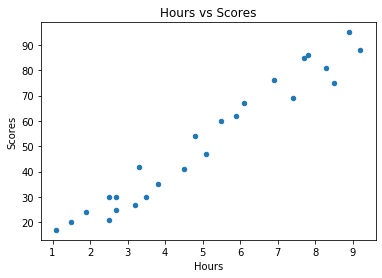

In [12]:
df.plot(kind ='scatter',x='Hours',y='Scores')
plt.title("Hours vs Scores")

In [13]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the data into train and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)
print("Training Successful")

Training Successful


#### Visualizing training set results

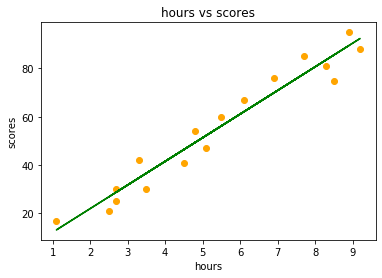

In [19]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,lr.predict(x_train),color='green')
plt.title('hours vs scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

#### Test Set

In [20]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [21]:
y_pred = lr.predict(x_test)

#### Visualizing the test set results

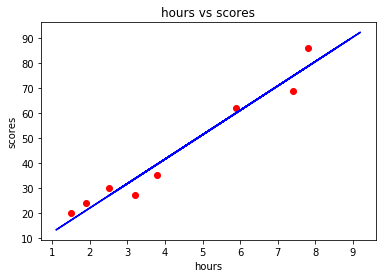

In [22]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title('hours vs scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [23]:
df=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

In [24]:
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Difference between the actual and predicted values

In [28]:
def DistributionPlot(RedFunction, BlueFunction,RedName, BlueName,Title):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    
    ax1= sns.distplot(RedFunction, hist=False, color='r',label=RedName)
    ax2= sns.distplot(BlueFunction, hist=False, color='b',label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.show()
    plt.close()

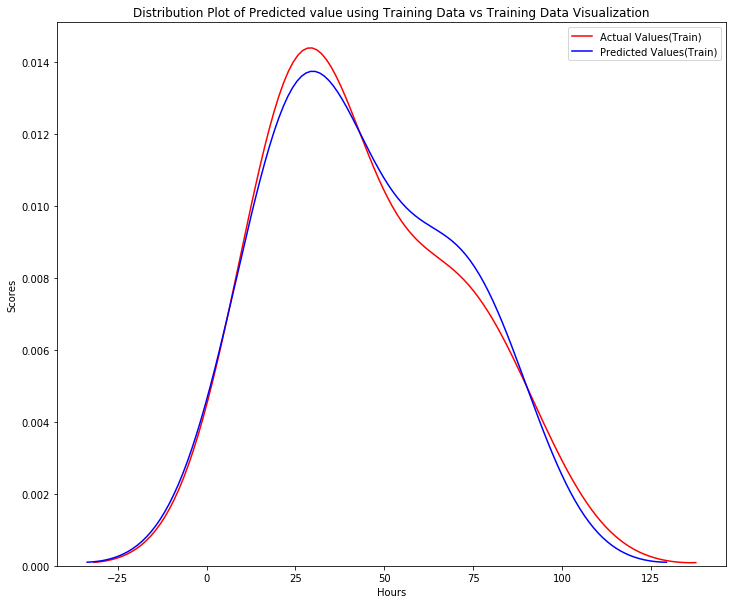

In [30]:
Title='Distribution Plot of Predicted value using Training Data vs Training Data Visualization'
DistributionPlot(y_test,y_pred, "Actual Values(Train)","Predicted Values(Train)",Title)

As we can see the actual and predicted values are close , So our prediction is right

#Predicting the score for 9.25 hours

In [33]:
pred= lr.predict([[9.25]])

In [34]:
pred

array([92.91505723])

In [35]:
print("predicted score",format(pred[0]))

predicted score 92.91505723477056
